In [1]:
#read in data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime

user = pd.read_csv('C:/Users/jinwe/Desktop/Insight/dc_2/yammer_users.csv')
event = pd.read_csv('C:/Users/jinwe/Desktop/Insight/dc_2/yammer_events.csv')
email = pd.read_csv('C:/Users/jinwe/Desktop/Insight/dc_2/yammer_emails.csv')
period = pd.read_csv('C:/Users/jinwe/Desktop/Insight/dc_2/dimension_rollup_periods.csv')

In [2]:
user.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


In [3]:
user.describe()

,user_id,company_id
count,19066.000000,19066.000000
mean,9532.500000,4602.923214
std,5504.024452,4363.468471
min,0.000000,1.000000
25%,4766.250000,109.000000
50%,9532.500000,3667.500000
75%,14298.750000,8431.750000
max,19065.000000,13198.000000


In [4]:
event.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [5]:
event.describe()

,user_id,user_type
count,340832.000000,325255.000000
mean,9983.835758,1.512238
std,5369.955949,0.754780
min,4.000000,1.000000
25%,5224.000000,1.000000
50%,11069.000000,1.000000
75%,14412.000000,2.000000
max,19065.000000,3.000000


In [6]:
email.head()

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0


In [7]:
email.describe()

,user_id,user_type
count,90389.000000,90389.000000
mean,8635.558187,2.097988
std,4957.734547,0.848892
min,0.000000,1.000000
25%,4426.000000,1.000000
50%,8631.000000,2.000000
75%,12670.000000,3.000000
max,19001.000000,3.000000


In [8]:
period.head()

,period_id,time_id,pst_start,pst_end,utc_start,utc_end
0,1.0,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-01 08:00:00,2013-01-02 08:00:00
1,1.0,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-02 08:00:00,2013-01-03 08:00:00
2,1.0,2013-01-03 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-03 08:00:00,2013-01-04 08:00:00
3,1.0,2013-01-04 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-04 08:00:00,2013-01-05 08:00:00
4,1.0,2013-01-05 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-05 08:00:00,2013-01-06 08:00:00


In [9]:
period.describe()

,period_id
count,56002.000000
mean,1920.645227
std,347.572356
min,1.000000
25%,2001.000000
50%,2001.000000
75%,2007.000000
max,2007.000000


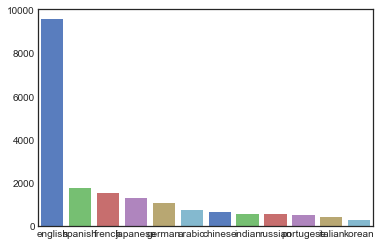

In [10]:
#plot number of users by language
from matplotlib import pyplot
sns.set_style("white")
sns.barplot(x = user['language'].value_counts().index,
            y = user['language'].value_counts().values,
            palette='muted', errcolor='dimgray')

Top five languages spoken by Yammer users are English, Spanish, French, Japanese, and German (in a descending order). Number of English speakers is far higher than that of any other language speakers.

In [11]:
event.event_type.unique()

array(['engagement', 'signup_flow'], dtype=object)

In [12]:
#drop 'signup_flow' from event dataframe
engagement=event[event['event_type']=='engagement']

In [13]:
#count number of engagement events by country
engagement.groupby(['location']).size()

location
Argentina                1607
Australia                7098
Austria                  2399
Belgium                  2665
Brazil                  10607
Canada                   8555
Chile                    1034
Colombia                 1831
Denmark                  2067
Egypt                    2180
Finland                  1832
France                  16469
Germany                 22304
Greece                    899
Hong Kong                1434
India                    9036
Indonesia                5919
Iran                     2974
Iraq                     1321
Ireland                   997
Israel                   2016
Italy                   11051
Japan                   24584
Korea                    6756
Malaysia                 2407
Mexico                   8648
Netherlands              4187
Nigeria                  1507
Norway                   1877
Pakistan                  966
Philippines              1239
Poland                   3628
Portugal                 1245
R

In [14]:
engagement.head(50)
engagement.dtypes

user_id        float64
occurred_at     object
event_type      object
event_name      object
location        object
device          object
user_type      float64
dtype: object

In [15]:
engagement[['occurred_at']]=engagement[['occurred_at']].apply(pd.to_datetime)
engagement.dtypes

C:\Users\jinwe\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


user_id               float64
occurred_at    datetime64[ns]
event_type             object
event_name             object
location               object
device                 object
user_type             float64
dtype: object

In [23]:
#define two-week predrop period:July 18 to August 1, 2014
pre_engagement=engagement[engagement['occurred_at']>'2014-7-18 00:00:00']
pre_engagement=pre_engagement[pre_engagement['occurred_at']<'2014-8-2 00:00:00']
len(pre_engagement)

46333

In [28]:
#define two-week postdrop period:August 2 to August 16, 2014
post_engagement=engagement[engagement['occurred_at']>'2014-8-2 00:00:00']
post_engagement=post_engagement[post_engagement['occurred_at']<'2014-8-17 00:00:00']
len(post_engagement)

36850

In [29]:
#Drop in number of dengagement events
len(pre_engagement)-len(post_engagement)

9483

Hypothesis #1: Five western countries (US, UK, Germany, Italy, France) contributed to most drop in number of dengagement events (likely due to people taking vacation)

In [37]:
west_pre_engagement=pre_engagement.query('location == "Italy" or location == "Germany" or location == "France" or location == "United Kingdom"or location == "United States"')
len(west_pre_engagement)

23675

In [38]:
west_post_engagement=post_engagement.query('location == "Italy" or location == "Germany" or location == "France" or location == "United Kingdom"or location == "United States"')
len(west_post_engagement)

17889

In [39]:
#Drop in number of dengagement events in the fieve western countries
len(west_pre_engagement)-len(west_post_engagement)

5786

In [40]:
5786/9483

0.6101444690498787

In [46]:
jp_pre_engagement=pre_engagement.query('location == "Japan"')
len(jp_pre_engagement)

3364

In [47]:
jp_post_engagement=post_engagement.query('location == "Japan"')
len(jp_post_engagement)

2986

In [48]:
len(jp_pre_engagement)-len(jp_post_engagement)

378

In [50]:
us_pre_engagement=pre_engagement.query('location == "United States"')
us_post_engagement=post_engagement.query('location == "United States"')
US=(len(us_pre_engagement)-len(us_post_engagement))/9483
print(US)

0.30781398291679846


In [51]:
uk_pre_engagement=pre_engagement.query('location == "United Kingdom"')
uk_post_engagement=post_engagement.query('location == "United Kingdom"')
UK=(len(uk_pre_engagement)-len(uk_post_engagement))/9483
print(UK)

0.06422018348623854


In [52]:
ITALY_pre_engagement=pre_engagement.query('location == "Italy"')
ITALY_post_engagement=post_engagement.query('location == "Italy"')
ITALY=(len(ITALY_pre_engagement)-len(ITALY_post_engagement))/9483
print(ITALY)

0.045871559633027525


In [53]:
Germany_pre_engagement=pre_engagement.query('location == "Germany"')
Germany_post_engagement=post_engagement.query('location == "Germany"')
Germany=(len(Germany_pre_engagement)-len(Germany_post_engagement))/9483
print(Germany)

0.10692818728250554


In [54]:
France_pre_engagement=pre_engagement.query('location == "France"')
France_post_engagement=post_engagement.query('location == "France"')
France=(len(France_pre_engagement)-len(France_post_engagement))/9483
print(France)

0.08531055573130866


In [55]:
d={'country':["US", "Germany", "France", "UK","Italy"], 'percentage of total drop in engagement events':[US, Germany, France, UK, ITALY]}
drop_percent=pd.DataFrame(data=d)
drop_percent

,country,percentage of total drop in engagement events
0,US,0.307814
1,Germany,0.106928
2,France,0.085311
3,UK,0.064220
4,Italy,0.045872


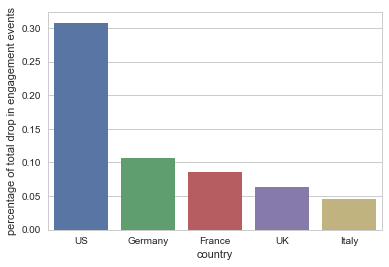

In [56]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="country", y="percentage of total drop in engagement events", data=drop_percent)

The US contributes to the largest percent drop (more than 30%) in engagement events between the predrop and postdrop periods, followed by Germany, France, UK, and Italy.

In [59]:
pre_engagement.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
11092,13317.0,2014-07-20 12:18:05,engagement,login,Italy,lenovo thinkpad,2.0
11093,13317.0,2014-07-20 12:18:13,engagement,home_page,Italy,lenovo thinkpad,2.0
11094,13317.0,2014-07-20 12:18:42,engagement,like_message,Italy,lenovo thinkpad,2.0
11095,13317.0,2014-07-20 12:19:11,engagement,home_page,Italy,lenovo thinkpad,2.0
11096,13317.0,2014-07-20 12:19:34,engagement,send_message,Italy,lenovo thinkpad,2.0


In [63]:
pre_engagement.event_name.unique()

array(['login', 'home_page', 'like_message', 'send_message', 'search_run',
       'view_inbox', 'search_click_result_2', 'search_click_result_5',
       'search_click_result_6', 'search_click_result_10',
       'search_click_result_4', 'search_click_result_1',
       'search_click_result_3', 'search_click_result_9',
       'search_autocomplete', 'search_click_result_7',
       'search_click_result_8'], dtype=object)

In [61]:
post_engagement.event_name.unique()

array(['login', 'home_page', 'view_inbox', 'send_message', 'like_message',
       'search_autocomplete', 'search_run', 'search_click_result_2',
       'search_click_result_5', 'search_click_result_8',
       'search_click_result_4', 'search_click_result_6',
       'search_click_result_1', 'search_click_result_9',
       'search_click_result_10', 'search_click_result_3',
       'search_click_result_7'], dtype=object)

Now that we have examined drop of engagement events by country. Not it is time to consider what types of engagement events, e.g., login, contributed more to the total engagement events.

In [72]:
count_a=pre_engagement.groupby(['event_name']).size()

In [73]:
count_b=post_engagement.groupby(['event_name']).size()

In [93]:
c=count_b-count_a
print(c)

event_name
home_page                -2716
like_message             -1684
login                     -984
search_autocomplete       -519
search_click_result_1      -64
search_click_result_10     -15
search_click_result_2      -52
search_click_result_3      -24
search_click_result_4      -49
search_click_result_5      -36
search_click_result_6      -22
search_click_result_7      -14
search_click_result_8      -26
search_click_result_9      -28
search_run                -510
send_message             -1036
view_inbox               -1704
dtype: int64


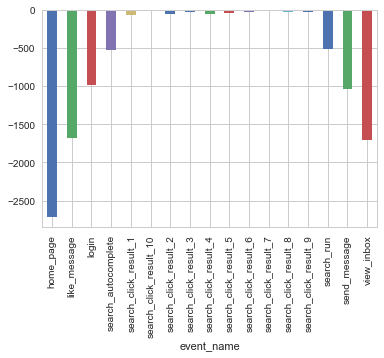

In [90]:
c.plot.bar()

This figure shows that "home page" event drops the most, followed by "view inbox" and "like message".

We have examined change in engagement events. Now let's focus on people.

In [99]:
pre_engagement.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
11092,13317.0,2014-07-20 12:18:05,engagement,login,Italy,lenovo thinkpad,2.0
11093,13317.0,2014-07-20 12:18:13,engagement,home_page,Italy,lenovo thinkpad,2.0
11094,13317.0,2014-07-20 12:18:42,engagement,like_message,Italy,lenovo thinkpad,2.0
11095,13317.0,2014-07-20 12:19:11,engagement,home_page,Italy,lenovo thinkpad,2.0
11096,13317.0,2014-07-20 12:19:34,engagement,send_message,Italy,lenovo thinkpad,2.0


In [104]:
pre_engagement['pre_people']=pre_engagement.groupby('user_id').cumcount() == 0
pre_people=pre_engagement[pre_engagement['pre_people']==True]
len(pre_people)

2130

In [107]:
pre_count=pre_people.groupby(['location']).size()
print(pre_count)

location
Argentina                10
Australia                49
Austria                  13
Belgium                  22
Brazil                   74
Canada                   60
Chile                    13
Colombia                 13
Denmark                  13
Egypt                    11
Finland                  12
France                  105
Germany                 142
Greece                   12
Hong Kong                 8
India                    59
Indonesia                32
Iran                     17
Iraq                     11
Ireland                   6
Israel                   15
Italy                    80
Japan                   165
Korea                    43
Malaysia                 10
Mexico                   46
Netherlands              35
Nigeria                  13
Norway                   11
Pakistan                  5
Philippines              11
Poland                   14
Portugal                  5
Russia                   74
Saudi Arabia             30
Singapore  

In [109]:
post_engagement['post_people']=post_engagement.groupby('user_id').cumcount() == 0
post_people=post_engagement[post_engagement['post_people']==True]
len(post_people)

1828

In [115]:
post_count=post_people.groupby(['location']).size()
print(post_count)

location
Argentina                12
Australia                41
Austria                  14
Belgium                   9
Brazil                   66
Canada                   41
Chile                     7
Colombia                 13
Denmark                  16
Egypt                     9
Finland                   9
France                   85
Germany                 116
Greece                    7
Hong Kong                 8
India                    57
Indonesia                27
Iran                     17
Iraq                      9
Ireland                   8
Israel                   10
Italy                    70
Japan                   142
Korea                    40
Malaysia                 15
Mexico                   43
Netherlands              30
Nigeria                  12
Norway                   12
Pakistan                  7
Philippines              10
Poland                   18
Portugal                 10
Russia                   61
Saudi Arabia             19
Singapore  

In [110]:
len(pre_people)-len(post_people)

302

In [116]:
diff=post_count-pre_count
diff

location
Argentina                2
Australia               -8
Austria                  1
Belgium                -13
Brazil                  -8
Canada                 -19
Chile                   -6
Colombia                 0
Denmark                  3
Egypt                   -2
Finland                 -3
France                 -20
Germany                -26
Greece                  -5
Hong Kong                0
India                   -2
Indonesia               -5
Iran                     0
Iraq                    -2
Ireland                  2
Israel                  -5
Italy                  -10
Japan                  -23
Korea                   -3
Malaysia                 5
Mexico                  -3
Netherlands             -5
Nigeria                 -1
Norway                   1
Pakistan                 2
Philippines             -1
Poland                   4
Portugal                 5
Russia                 -13
Saudi Arabia           -11
Singapore               -4
South Africa       

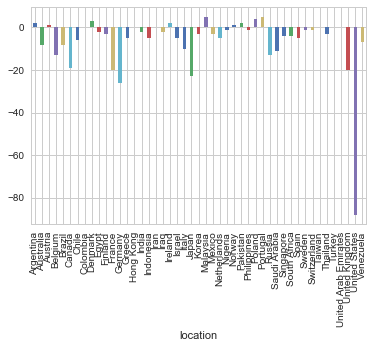

In [117]:
diff.plot.bar()

This figure shows that the US sees the largest drop in number of active users, followed by Germany, Japan, UK, France, and Canada. All six countries are developed countries primarily located in northern temperate region. 